In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=6)
    curr_image_dir = os.path.join(const.dir.images_hp_v6(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v6(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v6(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/60 [00:00<?, ?it/s]

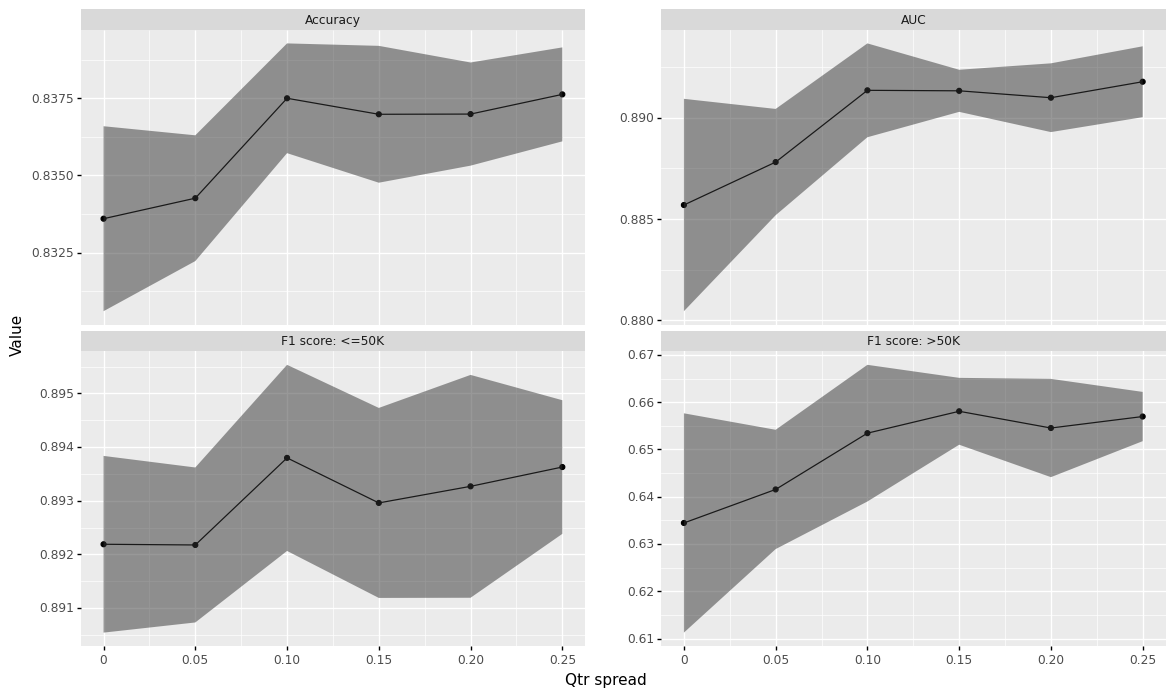

In [6]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [7]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.833599,0.885697,0.763326,0.892188,0.634464,0.002993,0.005241,0.011662,0.001648,0.023181
1,0.05,0.834263,0.887815,0.766863,0.892175,0.641552,0.002035,0.002623,0.006252,0.001445,0.012609
2,0.10,0.837497,0.891357,0.773623,0.893799,0.653446,0.001776,0.002316,0.006816,0.001736,0.014446
3,0.15,0.836979,0.891333,0.775516,0.892959,0.658072,0.002215,0.001039,0.003653,0.001772,0.007066
4,0.20,0.836985,0.890992,0.773903,0.893268,0.654537,0.001669,0.001697,0.004368,0.002078,0.010388
5,0.25,0.837623,0.891781,0.775296,0.893628,0.656963,0.001521,0.001749,0.002634,0.001246,0.005206


In [ ]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [ ]:
result_best_activation_function

In [ ]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

In [ ]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [ ]:
result_adam_beta1

In [ ]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

In [ ]:
result_oh_encoding

  0%|          | 0/30 [00:00<?, ?it/s]

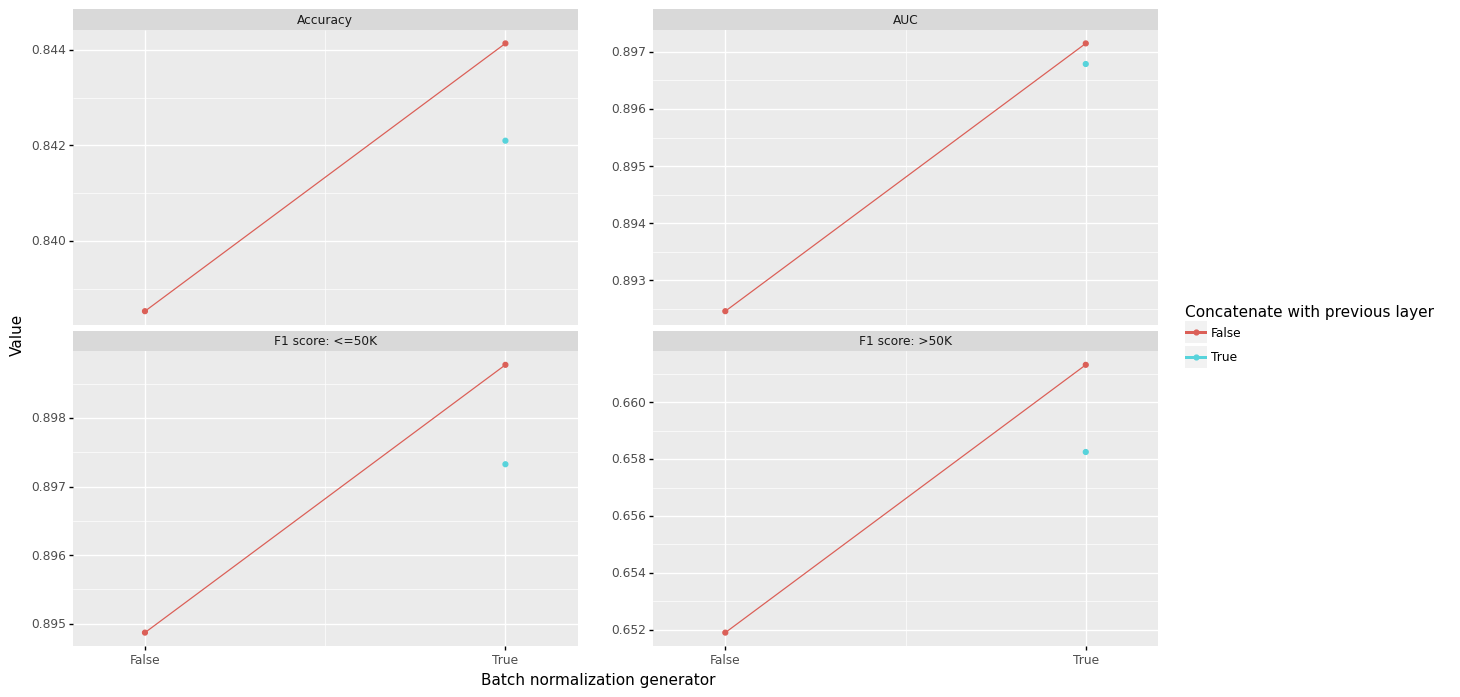

In [11]:
result_BN = plot_hp_tuning("BN")

In [12]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.838526,0.892462,0.773388,0.894871,0.651905,0.002343,0.001893,0.004117,0.001617,0.007470
1,True,False,0.844137,0.897147,0.780042,0.898774,0.661310,0.002051,0.001710,0.002800,0.001457,0.004620
2,True,True,0.842098,0.896787,0.777787,0.897325,0.658249,0.001306,0.001411,0.002499,0.000947,0.004749
